In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_SIRS = pd.read_csv('//content/drive/MyDrive/BANA 650 - Healthcare Analytics/BANA 650 Healthcare Project/BQ-Filtered_ICUSIRSAdm_18plus_V2.csv')

In [ ]:
df_SIRS.head()

,hadm_id,itemid,charttime,value,unit,icd9_code,short_title,subject_id,admittime,dischtime,age
0,146682,220227,2102-08-19 10:29:00,97.000000,%,78552,Septic shock,90609,2102-08-18 22:21:00,2102-08-30 15:16:00,52
1,115339,223762,2124-04-09 14:00:00,99.860000,?F,78552,Septic shock,84320,2124-04-04 16:13:00,2124-05-01 15:50:00,46
2,110600,225310,2158-10-21 04:09:00,61.000000,mmHg,99592,Severe sepsis,83629,2158-09-27 14:41:00,2158-11-06 17:00:00,52
3,111353,676,2117-08-22 04:45:00,99.679997,?F,78552,Septic shock,27235,2117-08-21 08:08:00,2117-08-27 14:15:00,62
4,102399,676,2120-07-09 14:15:00,98.239999,?F,99592,Severe sepsis,16860,2120-07-02 19:33:00,2120-07-23 11:45:00,56


In [ ]:
# Count the unique number of subject ids in the sirs dataset

unique_subject_count = df_SIRS['subject_id'].nunique()
print("Number of unique subject IDs:", unique_subject_count)

Number of unique subject IDs: 4680


In [ ]:
df_SIRS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11663915 entries, 0 to 11663914
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   hadm_id      int64  
 1   itemid       int64  
 2   charttime    object 
 3   value        float64
 4   unit         object 
 5   icd9_code    int64  
 6   short_title  object 
 7   subject_id   int64  
 8   admittime    object 
 9   dischtime    object 
 10  age          int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 978.9+ MB


### **Item ID Mapping, Statistics and Handling Outliers**

In [ ]:
unique_itemids = df_SIRS['itemid'].unique()
print("Unique item IDs:", unique_itemids)

Unique item IDs: [220227 223762 225310    676    651 225309    834   6701   8555 224422
    778 223761 220179 220180 220210     51 220235  51301    614    615
    618 220277  50820    646 220045 220050 220051    678   8368 224689
 224690    455    211   8441]


In [ ]:
# Expanded mapping based on the provided table
itemid_map = {
    # Systolic Blood Pressure
    220050: 'Systolic Blood Pressure',
    225309: 'Systolic Blood Pressure',
    220179: 'Systolic Blood Pressure',
    51: 'Systolic Blood Pressure',
    455: 'Systolic Blood Pressure',
    6701: 'Systolic Blood Pressure',

    # Diastolic Blood Pressure
    220051: 'Diastolic Blood Pressure',
    220180: 'Diastolic Blood Pressure',
    225310: 'Diastolic Blood Pressure',
    8368: 'Diastolic Blood Pressure',
    8441: 'Diastolic Blood Pressure',
    8555: 'Diastolic Blood Pressure',

    # pH Value
    50820: 'pH Value',

    # Blood Oxygen Saturation (SO₂)
    220227: 'Blood Oxygen Saturation (SO₂)',
    220277: 'Blood Oxygen Saturation (SO₂)',
    834: 'Blood Oxygen Saturation (SO₂)',
    646: 'Blood Oxygen Saturation (SO₂)',

    # Temperature
    223762: 'Temperature',
    223761: 'Temperature',
    676: 'Temperature',
    678: 'Temperature',

    # Heart Rate
    220045: 'Heart Rate',
    211: 'Heart Rate',

    # Respiratory Rate
    220210: 'Respiratory Rate',
    224422: 'Respiratory Rate',
    224689: 'Respiratory Rate',
    224690: 'Respiratory Rate',
    618: 'Respiratory Rate',
    651: 'Respiratory Rate',
    615: 'Respiratory Rate',
    614: 'Respiratory Rate',

    # CO₂ Partial Pressure (PaCO₂)
    220235: 'CO₂ Partial Pressure (PaCO₂)',
    778: 'CO₂ Partial Pressure (PaCO₂)',

    # White Blood Cell Count
    51301: 'White Blood Cell Count'
}

df_SIRS['parameter'] = df_SIRS['itemid'].map(itemid_map)
df_SIRS = df_SIRS.dropna(subset=['parameter'])
print(df_SIRS[['parameter', 'itemid', 'value']].head())

                       parameter  itemid      value
0  Blood Oxygen Saturation (SO₂)  220227  97.000000
1                    Temperature  223762  99.860000
2       Diastolic Blood Pressure  225310  61.000000
3                    Temperature     676  99.679997
4                    Temperature     676  98.239999


In [ ]:
df_SIRS.head()

,hadm_id,itemid,charttime,value,unit,icd9_code,short_title,subject_id,admittime,dischtime,age,parameter
0,146682,220227,2102-08-19 10:29:00,97.000000,%,78552,Septic shock,90609,2102-08-18 22:21:00,2102-08-30 15:16:00,52,Blood Oxygen Saturation (SO₂)
1,115339,223762,2124-04-09 14:00:00,99.860000,?F,78552,Septic shock,84320,2124-04-04 16:13:00,2124-05-01 15:50:00,46,Temperature
2,110600,225310,2158-10-21 04:09:00,61.000000,mmHg,99592,Severe sepsis,83629,2158-09-27 14:41:00,2158-11-06 17:00:00,52,Diastolic Blood Pressure
3,111353,676,2117-08-22 04:45:00,99.679997,?F,78552,Septic shock,27235,2117-08-21 08:08:00,2117-08-27 14:15:00,62,Temperature
4,102399,676,2120-07-09 14:15:00,98.239999,?F,99592,Severe sepsis,16860,2120-07-02 19:33:00,2120-07-23 11:45:00,56,Temperature


In [ ]:
missing_values = df_SIRS.isna().sum()
print(missing_values)

hadm_id              0
itemid               0
charttime            0
value            25851
unit           4904248
icd9_code            0
short_title          0
subject_id           0
admittime            0
dischtime            0
age                  0
parameter            0
dtype: int64


In [ ]:
parameter_summary = df_SIRS.groupby('parameter')['value'].describe()
print("Summary statistics for each parameter:\n", parameter_summary)


Summary statistics for each parameter:
                                    count        mean         std    min  \
parameter                                                                 
Blood Oxygen Saturation (SO₂)  2027313.0   96.883639   24.080779   0.00   
CO₂ Partial Pressure (PaCO₂)    138585.0   41.828827   12.989815   0.00   
Diastolic Blood Pressure       1922505.0   58.924669  210.196151 -12.00   
Heart Rate                     2041175.0   92.104651   20.274259 -88.00   
Respiratory Rate               2798551.0   20.045868   10.169261  -1.00   
Systolic Blood Pressure        1923378.0  114.850888  159.552207  -8.00   
Temperature                     488765.0   98.489582    5.760472   0.00   
White Blood Cell Count          144932.0   12.608743    9.306472   0.00   
pH Value                        152860.0    7.362130    0.095966   6.35   

                                 25%     50%     75%        max  
parameter                                                        
Bl

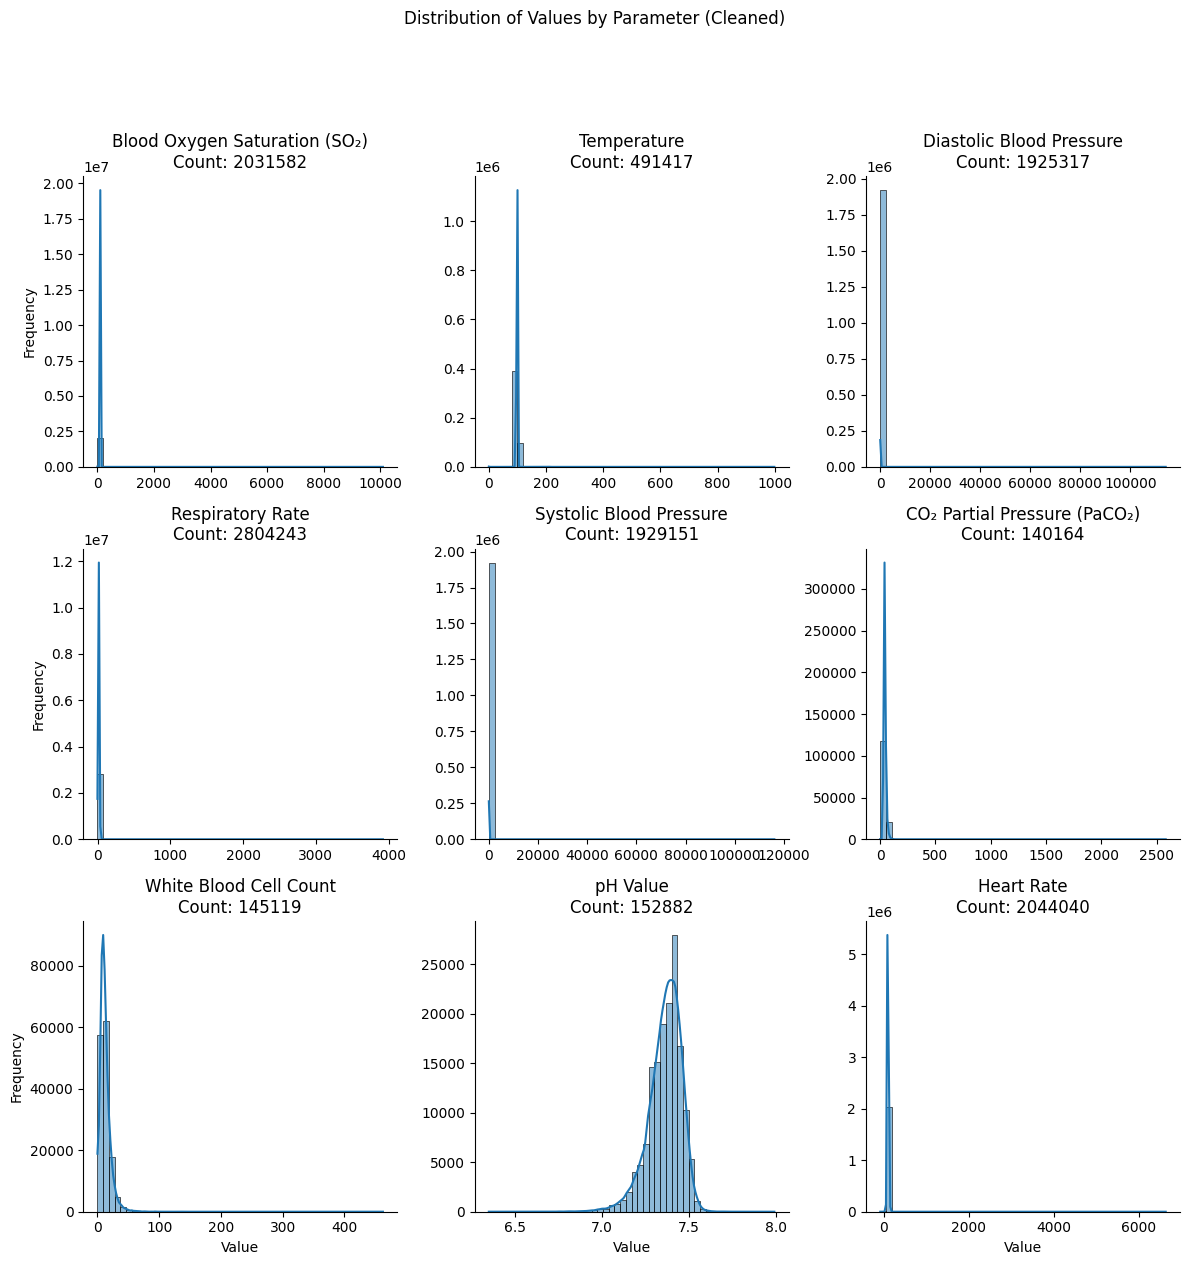

In [ ]:
# Review cleaned data with histplot by parameter
# Calculate record counts for each parameter
parameter_counts = df_SIRS['parameter'].value_counts()

g = sns.FacetGrid(df_SIRS, col='parameter', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', bins=50, kde=True)

for ax, param in zip(g.axes.flat, g.col_names):
    count = parameter_counts[param]
    ax.set_title(f"{param}\nCount: {count}")

g.set_axis_labels("Value", "Frequency")
g.fig.suptitle("Distribution of Values by Parameter (Cleaned)", y=1.05)

plt.tight_layout()
plt.show()

In [ ]:
# Function to handle outliers using IQR method for each parameter and itemid
def handle_outliers(df):
    """
    Handle outliers grouped by parameter and itemid using the IQR method,
    but preserve rows with null, blank, or zero values.

    Args:
        df (DataFrame): Input dataframe with columns 'parameter', 'itemid', and 'value'.

    Returns:
        DataFrame: Cleaned dataframe with outliers removed, keeping null, blank, or zero values.
    """
    def handle_outliers_withIQR(group):
        # Calculate Q1, Q3, and IQR
        q1 = group['value'].quantile(0.25)
        q3 = group['value'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Filter out outliers, but keep null, blank, or zero values -- NEED TO KEEP FOR INTERPOLATION STEP
        return group[
            (group['value'].isna()) |  # Keep null values
            (group['value'] == 0) |     # Keep zero values
            (group['value'].astype(str).str.strip() == "") |  # Keep blank values
            ((group['value'] >= lower_bound) & (group['value'] <= upper_bound))  # Keep values within bounds
        ]

    cleaned_df = df.groupby(['parameter', 'itemid'], group_keys=False).apply(handle_outliers_withIQR)

    return cleaned_df

df_SIRS_cleaned = handle_outliers(df_SIRS)

print("Data after handling outliers:")
print(df_SIRS_cleaned.head())



Data after handling outliers:
        hadm_id  itemid            charttime  value unit  icd9_code  \
141517   157559     646  2129-08-02 08:00:00   96.0  NaN      99592   
141518   129535     646  2138-07-09 14:00:00   98.0  NaN      99591   
141519   137656     646  2120-12-24 15:00:00  100.0  NaN      78552   
141520   139263     646  2164-04-04 01:00:00  100.0  NaN      99592   
141521   147371     646  2156-12-25 21:00:00  100.0  NaN      99592   

          short_title  subject_id            admittime            dischtime  \
141517  Severe sepsis        6702  2129-04-18 14:51:00  2129-10-27 01:00:00   
141518         Sepsis       22327  2138-07-04 15:25:00  2138-07-16 16:22:00   
141519   Septic shock       31880  2120-12-22 19:55:00  2121-01-14 20:54:00   
141520  Severe sepsis       21002  2164-04-03 15:49:00  2164-04-13 13:40:00   
141521  Severe sepsis       18007  2156-12-18 22:47:00  2157-02-04 14:00:00   

        age                      parameter  
141517   81  Blood Oxyg

<ipython-input-13-b242d063d096>:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_df = df.groupby(['parameter', 'itemid'], group_keys=False).apply(handle_outliers_withIQR)


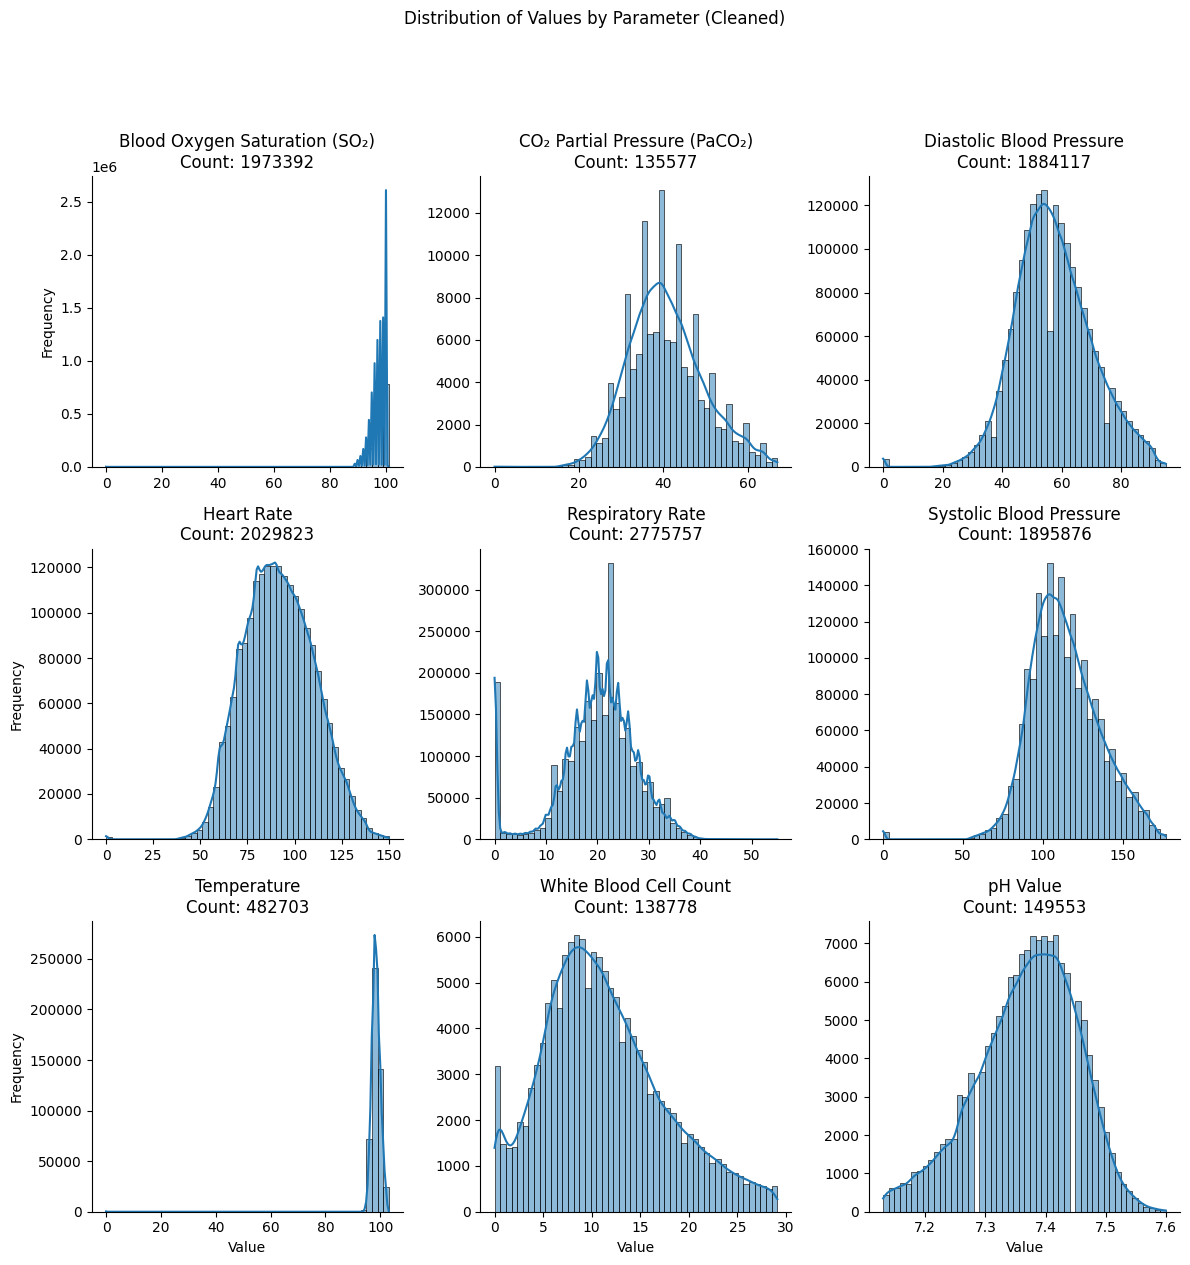

In [ ]:
# Review cleaned data with histplot by parameter
# Calculate record counts for each parameter
parameter_counts = df_SIRS_cleaned['parameter'].value_counts()

g = sns.FacetGrid(df_SIRS_cleaned, col='parameter', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', bins=50, kde=True)

for ax, param in zip(g.axes.flat, g.col_names):
    count = parameter_counts[param]
    ax.set_title(f"{param}\nCount: {count}")

g.set_axis_labels("Value", "Frequency")
g.fig.suptitle("Distribution of Values by Parameter (Cleaned)", y=1.05)

plt.tight_layout()
plt.show()

**With the below comparison, we can see that using IQR methods to handle outliers only removes a small percentage of each parameter's records**

In [ ]:
# Calculate counts for each parameter in the original and cleaned data
original_counts = df_SIRS['parameter'].value_counts()
cleaned_counts = df_SIRS_cleaned['parameter'].value_counts()

# Combine counts into a single dataframe
comparison_df = pd.DataFrame({
    'Original Count': original_counts,
    'Cleaned Count': cleaned_counts
}).fillna(0)

# Calculate % of rows removed
comparison_df['% Removed'] = ((comparison_df['Original Count'] - comparison_df['Cleaned Count']) / comparison_df['Original Count']) * 100
comparison_df = comparison_df.reset_index().rename(columns={'index': 'Parameter'})

comparison_df['Original Count'] = comparison_df['Original Count'].apply(lambda x: f"{int(x):,}")
comparison_df['Cleaned Count'] = comparison_df['Cleaned Count'].apply(lambda x: f"{int(x):,}")
comparison_df['% Removed'] = comparison_df['% Removed'].apply(lambda x: f"{x:.2f}%")

from IPython.display import display
display(comparison_df)

,parameter,Original Count,Cleaned Count,% Removed
0,Respiratory Rate,"2,804,243","2,775,757",1.02%
1,Heart Rate,"2,044,040","2,029,823",0.70%
2,Blood Oxygen Saturation (SO₂),"2,031,582","1,973,392",2.86%
3,Systolic Blood Pressure,"1,929,151","1,895,876",1.72%
4,Diastolic Blood Pressure,"1,925,317","1,884,117",2.14%
5,Temperature,"491,417","482,703",1.77%
6,pH Value,"152,882","149,553",2.18%
7,White Blood Cell Count,"145,119","138,778",4.37%
8,CO₂ Partial Pressure (PaCO₂),"140,164","135,577",3.27%


In [ ]:
parameter_summary_cleaned = df_SIRS_cleaned.groupby('parameter')['value'].describe()
print("Summary statistics after cleaning:\n", parameter_summary_cleaned)


Summary statistics after cleaning:
                                    count        mean        std   min    25%  \
parameter                                                                      
Blood Oxygen Saturation (SO₂)  1969123.0   97.251061   2.809004  0.00  96.00   
CO₂ Partial Pressure (PaCO₂)    133998.0   40.648331   8.851638  0.00  34.00   
Diastolic Blood Pressure       1881305.0   57.361594  12.736209  0.00  49.00   
Heart Rate                     2026958.0   91.748308  18.557568  0.00  78.00   
Respiratory Rate               2770065.0   19.839877   8.017581  0.00  16.00   
Systolic Blood Pressure        1890103.0  113.833048  21.502068  0.00  99.00   
Temperature                     480051.0   98.434576   1.847380  0.00  97.40   
White Blood Cell Count          138591.0   11.339379   6.197561  0.00   6.90   
pH Value                        149531.0    7.368650   0.083885  7.13   7.32   

                                  50%         75%    max  
parameter               

In [ ]:
# Central Tendencies for each Parameter
# Calculate mean, median, and count of missing values for each parameter
central_tendency = df_SIRS_cleaned.groupby('parameter').agg(
    mean=('value', 'mean'),
    median=('value', 'median'),
    missing_values=('value', lambda x: x.isna().sum())
).reset_index()

# Display the central tendency DataFrame
print(central_tendency)


                       parameter        mean  median  missing_values
0  Blood Oxygen Saturation (SO₂)   97.251061   98.00            4269
1   CO₂ Partial Pressure (PaCO₂)   40.648331   40.00            1579
2       Diastolic Blood Pressure   57.361594   56.00            2812
3                     Heart Rate   91.748308   91.00            2865
4               Respiratory Rate   19.839877   21.00            5692
5        Systolic Blood Pressure  113.833048  112.00            5773
6                    Temperature   98.434576   98.40            2652
7         White Blood Cell Count   11.339379   10.50             187
8                       pH Value    7.368650    7.38              22


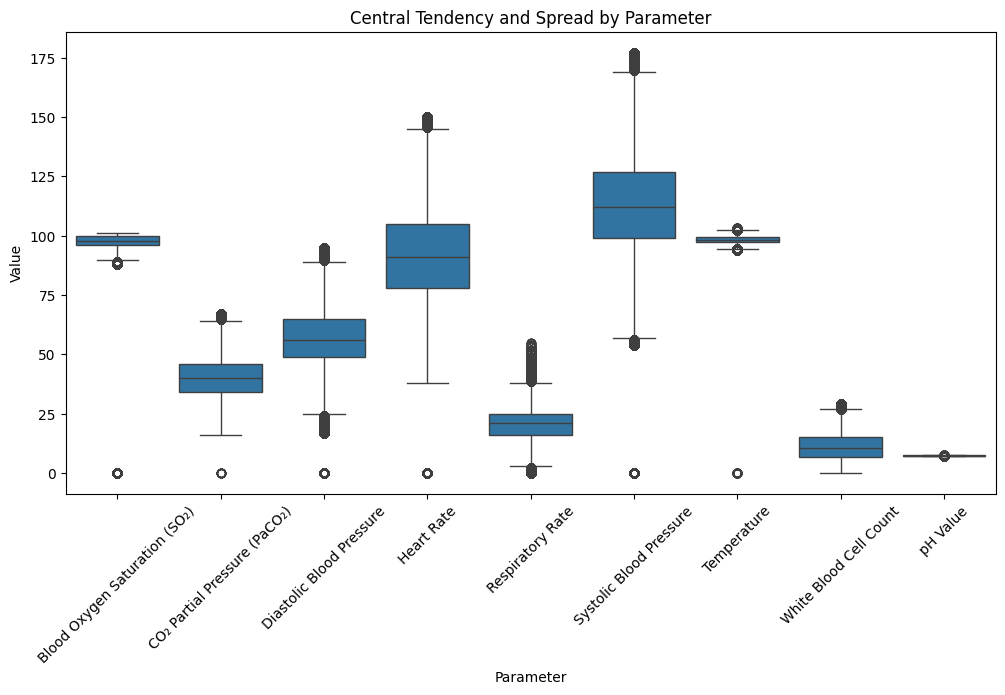

In [ ]:
# Box plot for Central Tendency and Spread by Parameter
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_SIRS_cleaned, x='parameter', y='value')
plt.title('Central Tendency and Spread by Parameter')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_SIRS_cleaned.to_csv('/content/drive/MyDrive/BANA 650 - Healthcare Analytics/BANA 650 Healthcare Project/df_SIRS_cleaned.csv', index=False)


In [1]:
!jupyter nbconvert --to html BANA650_Preprocessing.ipynb

[NbConvertApp] Converting notebook BANA650_Preprocessing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 871852 bytes to BANA650_Preprocessing.html
